#  Import Bibliothèque et données sur l'action apple via yfinance


In [ ]:

import yfinance as yf  # pour répurer l'action apple
import pandas as pd
import matplotlib.pyplot as plt  # pour la visualisation
from sklearn.model_selection import train_test_split # ---> Pour split donnée de train et donnée de test
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # --> Pour évaluer le modele


apple_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01') # lib yahoo finance


[*********************100%***********************]  1 of 1 completed


# Préparation des données


In [ ]:
apple_data = apple_data.reset_index()

apple_data['Timestamp'] = (apple_data['Date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1d') # On change le format de date par J


X = apple_data[['Timestamp']]
Y = apple_data['Open']

print(f"Données disponibles : {apple_data.head()}")

Données disponibles : Price        Date  Adj Close      Close       High        Low       Open  \
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL   
0      2020-01-02  72.796036  75.087502  75.150002  73.797501  74.059998   
1      2020-01-03  72.088295  74.357498  75.144997  74.125000  74.287498   
2      2020-01-06  72.662704  74.949997  74.989998  73.187500  73.447502   
3      2020-01-07  72.320992  74.597504  75.224998  74.370003  74.959999   
4      2020-01-08  73.484352  75.797501  76.110001  74.290001  74.290001   

Price      Volume Timestamp  
Ticker       AAPL            
0       135480400     18263  
1       146322800     18264  
2       118387200     18267  
3       108872000     18268  
4       132079200     18269  


# Visualisation

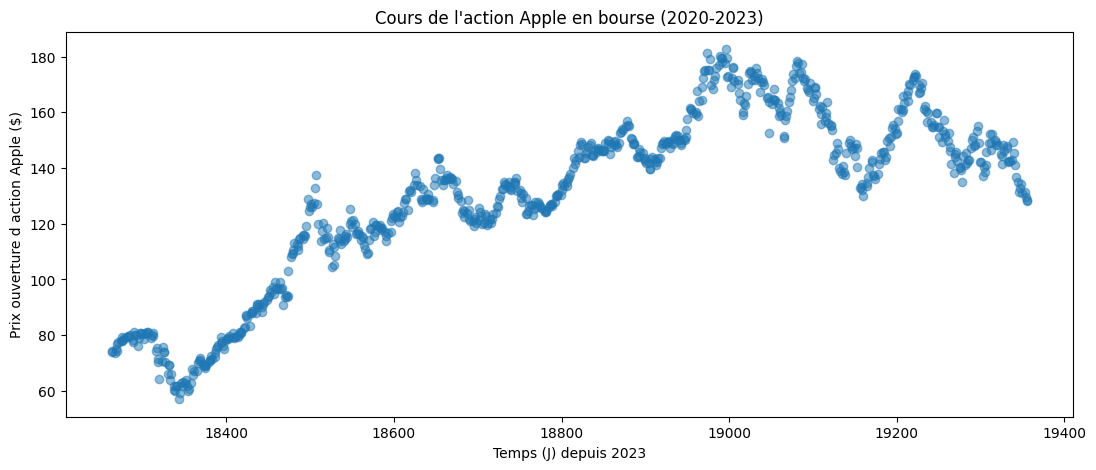

In [ ]:
plt.figure(figsize=(13, 5))
plt.scatter(X, Y, alpha=0.5)
plt.xlabel("Temps (J) depuis 2023")
plt.ylabel("Prix ouverture d action Apple ($)")
plt.title("Cours de l'action Apple en bourse (2020-2023)")
plt.show()


# Séparation donnée test & train


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Régression linéaire

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept}") # ordonnée à l'origine
print(f"Coef: {slope}") #associté à la variable de temps

Intercept: [-1370.26113751]
Coef: [0.07974157]


# Prédiction



In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation du modèle

In [ ]:
r2 = r2_score(Y_test, y_pred_test)
print(f"R² score: {r2}")

R² score: 0.675862939783433


# Resulat

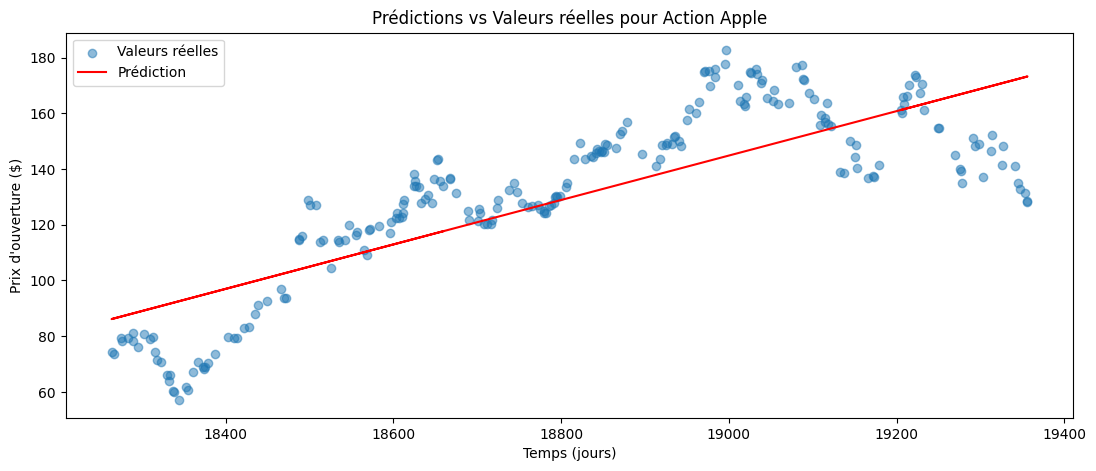

In [ ]:
plt.figure(figsize=(13, 5))
plt.scatter(X_test, Y_test, label="Valeurs réelles", alpha=0.5)
plt.plot(X_test, y_pred_test, color='red', label="Prédiction")
plt.xlabel("Temps (jours)")
plt.ylabel("Prix d'ouverture ($)")
plt.title("Prédictions vs Valeurs réelles pour Action Apple")
plt.legend()
plt.show()

# Conclusion


Le projet semble fonctionner seulement un modèle linéaire n'est pas adapté, il faudrait essayer avec un modèle polynomial et intégrer davantage de features. Voir -- > https://shs.cairn.info/revue-regards-croises-sur-l-economie-2008-1-page-141?lang=fr